In [180]:
import numpy as np
import itertools
import scipy.sparse as sparse
import os
import pickle

import matplotlib.pyplot as plt
import importlib
import mtgcardclassification
importlib.reload(mtgcardclassification)
from mtgcardclassification import *


In [124]:
#change this to a local folder on your PC in which "scryfall-all-cards.txt" is stored
direc = 'C:/Users/basvanopheusden/Documents/MTG/'

if os.path.exists(direc + 'scryfall-all-cards-pickled.txt'):
    print('using pre-generated all_cards')
    all_cards = pickle_load(direc,'scryfall-all-cards-pickled.txt')
else: 
    all_cards = load_all_cards(direc)

using pre-generated all_cards


In [181]:
if False and os.path.exists(direc + 'scryfall-filtered-cards-pickled.txt'):
    print('using pre-generated filtered_cards')
    filtered_cards = pickle_load(direc,'scryfall-filtered-cards-pickled.txt')
else: 
    filtered_cards = get_filtered_cards(direc,all_cards)

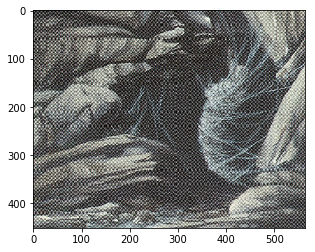

In [183]:
card = np.random.choice(all_cards)
art = get_cropped_art(card)
plt.imshow(art)
plt.show()

In [184]:
unique_card_names,index,num_reprints = np.unique([c['name'] for c in filtered_cards[::-1]],
                                                 return_counts = True,return_index=True)
unique_filtered_cards = [filtered_cards[::-1][i] for i in index]
#reversing the filtered_cards list is necessary to select the first printed edition of each card
print('Number of unique filtered cards:',len(unique_filtered_cards))

Number of unique filtered cards: 17457


In [167]:
most_reprinted_cards = np.array(list(zip(unique_card_names,num_reprints)))[np.argsort(num_reprints)[::-1]][:50]

In [168]:
illegal_cards = list(filter(lambda c: not c['legalities']['vintage'] in ['legal','restricted'], filtered_cards))
print([c['name'] for c in illegal_cards])

['Falling Star', 'Shahrazad', 'Chaos Orb', 'Chaos Orb', 'Chaos Orb']


In [185]:
sets,counts = np.unique([c['set_name'] for c in unique_filtered_cards],return_counts=True)
list(zip(sets[np.argsort(counts)],np.sort(counts)))

[('Eternal Masters', 1),
 ('Eighth Edition', 1),
 ('Time Spiral Timeshifted', 1),
 ('Limited Edition Beta', 2),
 ('Planechase', 4),
 ('Planechase 2012', 17),
 ('Starter 1999', 26),
 ('Commander 2013', 43),
 ('Commander 2011', 46),
 ('Commander 2017', 50),
 ('Conspiracy', 51),
 ('Commander 2018', 53),
 ('Commander 2016', 54),
 ('Commander 2014', 55),
 ('Commander 2015', 55),
 ('Conspiracy: Take the Crown', 65),
 ('Arabian Nights', 73),
 ('Antiquities', 80),
 ('Battlebond', 82),
 ('Magic 2012', 89),
 ('Fallen Empires', 98),
 ('Magic 2013', 99),
 ('Magic 2010', 102),
 ('Magic 2011', 104),
 ('Homelands', 105),
 ('Magic 2014', 106),
 ('Portal Second Age', 112),
 ('The Dark', 112),
 ("Urza's Destiny", 123),
 ("Dragon's Maze", 123),
 ('Exodus', 124),
 ('Stronghold', 126),
 ('Scourge', 127),
 ('Apocalypse', 129),
 ('Dark Ascension', 129),
 ('Magic 2015', 130),
 ('Born of the Gods', 130),
 ('Prophecy', 131),
 ('Worldwake', 132),
 ('Judgment', 133),
 ("Urza's Legacy", 133),
 ('Alliances', 133),


In [131]:
#leagcy, do not use
#def get_color_asymmetry(f):
#    if np.sum(f[1:])>0:
#        return sts.power_divergence(f[1:],(color_counts[1:]/np.sum(color_counts[1:])*np.sum(f[1:])),lambda_ = "log-likelihood")
#    else:
#        return 0,1

In [192]:
mono_colors = [['W'],['U'],['B'],['R'],['G']]
keys = ['name','power','toughness','type','subtype','manacost','oracletext']
m,matching_cards,inds = classify_card_colors_kfold(unique_filtered_cards,keys,10,mono_colors)

[['W'], ['U'], ['B'], ['R'], ['G']]
loading cards
building design matrix
building design matrix for name
building design matrix for power
building design matrix for toughness
building design matrix for type
building design matrix for subtype
building design matrix for manacost
building design matrix for oracletext
starting fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 105 seconds


C:\Users\basvanopheusden\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 107 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 114 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 138 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.3min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 164 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 123 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 106 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 62307 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 1038.4min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 1038.4min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 120 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 113 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


In [193]:
with open(direc + 'classification_model_5c_color_identity_pickled.txt','wb') as f:
    pickle.dump((m,matching_cards),f)

In [194]:
most_predictive_features = get_most_predictive_features(m)
#Note: this does not work for binary classification, only 2+ colors
[(x,y,c) for ((x,y),d,c) in most_predictive_features]

[('subtype', 'Zombie', 'B'),
 ('subtype', 'Merfolk', 'U'),
 ('subtype', 'Elf', 'G'),
 ('oracletext', 'haste', 'R'),
 ('subtype', 'Goblin', 'R'),
 ('subtype', 'Angel', 'W'),
 ('subtype', 'Illusion', 'U'),
 ('subtype', 'Demon', 'B'),
 ('subtype', 'Druid', 'G'),
 ('oracletext', 'reach', 'G'),
 ('subtype', 'Cleric', 'W'),
 ('subtype', 'Vampire', 'B'),
 ('oracletext', 'deathtouch', 'B'),
 ('oracletext', 'fear', 'B'),
 ('subtype', 'Soldier', 'W'),
 ('subtype', 'Skeleton', 'B'),
 ('oracletext', 'vigilance', 'W'),
 ('subtype', 'Kor', 'W'),
 ('subtype', 'Rat', 'B'),
 ('subtype', 'Horror', 'B'),
 ('subtype', 'Wizard', 'U'),
 ('subtype', 'Plant', 'G'),
 ('oracletext', 'green', 'G'),
 ('oracletext', 'forestwalk', 'G'),
 ('oracletext', 'with_flying', 'G'),
 ('subtype', 'Knight', 'W'),
 ('subtype', 'Minotaur', 'R'),
 ('name', 'goblin', 'R'),
 ('oracletext', 'black', 'B'),
 ('oracletext', 'discards', 'B'),
 ('oracletext', 'trample', 'G'),
 ('oracletext', 'flying', 'U'),
 ('subtype', 'Vedalken', 'U'),

In [195]:
accuracy = np.mean(m.is_correct)
print(accuracy)

0.8030245746691872


In [196]:
def plot_predicted_dist(m,i,alpha=1):
    plt.bar(np.arange(0,len(m.unique_colors)),m.predicted_color_dists[i,:],alpha=alpha)
    plt.xticks(np.arange(0,len(m.unique_colors)),labels=m.unique_colors, rotation=90)
    plt.show()

def show_classification_info(m,cards,i,show_plot=True):
    card = cards[i]
    predicted_colors = m.unique_colors[np.argmax(m.predicted_color_dists[i,:])]
    
    features,importance,intercept = m.get_features_by_importance(i,predicted_colors)
    
    print('----------------')
    print("Card:",card['name'])
    print("Colors:",card["colors"])
    print("Mana cost:",card['mana_cost'])
    print("type:",card["type_line"])
    print("Predicted colors",[predicted_colors])
    print("Confidence:",m.confidence[i])
    print("Oracle text:",card['oracle_text'])
    print("Intercept:",intercept)
    print("Strongest features:",[(features[k],importance[k]) for k in np.argsort(importance)[::-1] if importance[k]>0][:10])
    if show_plot:
        plot_predicted_dist(m,i)

----------------
Card: Scion of Glaciers
Colors: ['U']
Mana cost: {2}{U}{U}
type: Creature — Elemental
Predicted colors ['U']
Confidence: 0.5532949228195899
Oracle text: {U}: Scion of Glaciers gets +1/-1 until end of turn.
Intercept: 0.009103843156922215
Strongest features: [(('subtype', 'Elemental'), 0.36319548180408157), (('oracletext', 'turn'), 0.32431111210471963), (('oracletext', 'gets_+1/-1'), 0.20530795598975382), (('oracletext', '{@}'), 0.1793090546675089), (('oracletext', '+1/-1'), 0.17071214127479842), (('oracletext', 'gets_+1/-1_until_end_of'), 0.15916353578765455), (('oracletext', '+1/-1_until_end_of_turn'), 0.15916353578765455), (('oracletext', '+1/-1_until_end_of'), 0.15916353578765455), (('oracletext', '+1/-1_until_end'), 0.15916353578765455), (('oracletext', '+1/-1_until'), 0.15916353578765455)]


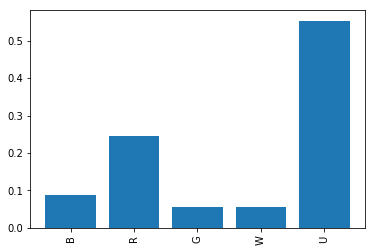

----------------
Card: Aether Poisoner
Colors: ['B']
Mana cost: {1}{B}
type: Creature — Human Artificer
Predicted colors ['B']
Confidence: 0.34815137575637695
Oracle text: Deathtouch (Any amount of damage this deals to a creature is enough to destroy it.)
When Aether Poisoner enters the battlefield, you get {E}{E} (two energy counters).
Whenever Aether Poisoner attacks, you may pay {E}{E}. If you do, create a 1/1 colorless Servo artifact creature token.
Intercept: -0.04351246397606796
Strongest features: [(('oracletext', 'deathtouch'), 1.9168900384387781), (('toughness', '1'), 0.4346010288965982), (('oracletext', 'creature'), 0.2920317070788065), (('oracletext', 'create_a_1/1'), 0.26926891513092294), (('oracletext', 'a_1/1'), 0.1684032338522625), (('manacost', '{@}'), 0.0963422876345202), (('oracletext', 'pay'), 0.0890827083069659), (('oracletext', 'a'), 0.08850464064092389), (('oracletext', 'whenever'), 0.08203505112972878), (('oracletext', 'if'), 0.060559486490512106)]


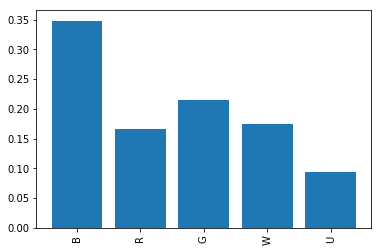

----------------
Card: Vision Charm
Colors: ['U']
Mana cost: {U}
type: Instant
Predicted colors ['U']
Confidence: 0.9973411342005927
Oracle text: Choose one —
• Target player puts the top four cards of their library into their graveyard.
• Choose a land type and a basic land type. Each land of the first chosen type becomes the second chosen type until end of turn.
• Target artifact phases out. (While it's phased out, it's treated as though it doesn't exist. It phases in before its controller untaps during their next untap step.)
Intercept: 0.0072808649864709515
Strongest features: [(('oracletext', 'out'), 0.7066233006301407), (('oracletext', 'type'), 0.4771427627497778), (('oracletext', 'a_land'), 0.41687599157549476), (('oracletext', 'becomes_the'), 0.3797411297948161), (('oracletext', 'into'), 0.360282518110316), (('oracletext', 'the_top'), 0.3367964454028452), (('type', 'Instant'), 0.30761493018509195), (('oracletext', 'into_their_graveyard'), 0.3013430316882379), (('oracletext', 'l

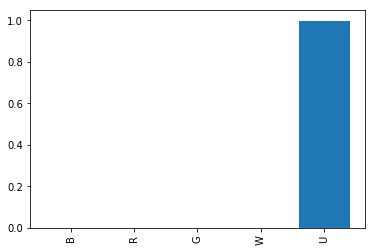

----------------
Card: World Queller
Colors: ['W']
Mana cost: {3}{W}{W}
type: Creature — Avatar
Predicted colors ['R']
Confidence: 0.39020933200969465
Oracle text: At the beginning of your upkeep, you may choose a card type. If you do, each player sacrifices a permanent of that type.
Intercept: 0.0034567338829646437
Strongest features: [(('oracletext', 'you_may'), 0.49361405987249146), (('oracletext', 'each_player_sacrifices'), 0.4858275238846949), (('oracletext', 'at'), 0.4087514674856575), (('oracletext', 'if'), 0.21781423978994274), (('oracletext', 'sacrifices_a'), 0.20730744978821103), (('type', 'Creature'), 0.2037590270517338), (('oracletext', 'player_sacrifices'), 0.19544822617770083), (('oracletext', 'sacrifices_a_permanent'), 0.17299574107011262), (('oracletext', 'each_player_sacrifices_a'), 0.16585394256016237), (('oracletext', 'that'), 0.15909661785755772)]


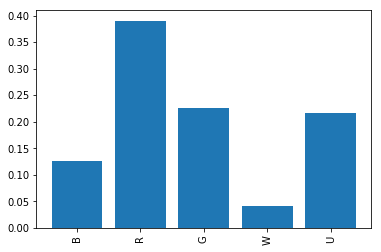

----------------
Card: Root-Kin Ally
Colors: ['G']
Mana cost: {4}{G}{G}
type: Creature — Elemental Warrior
Predicted colors ['G']
Confidence: 0.48213996656753544
Oracle text: Convoke (Your creatures can help cast this spell. Each creature you tap while casting this spell pays for {1} or one mana of that creature's color.)
Tap two untapped creatures you control: Root-Kin Ally gets +2/+2 until end of turn.
Intercept: 0.0070914306839117355
Strongest features: [(('type', 'Creature'), 0.8498463555025415), (('oracletext', '+2/+2'), 0.5889933602582024), (('oracletext', 'convoke'), 0.2701305474258372), (('oracletext', 'you_control'), 0.21741397924896466), (('oracletext', 'turn'), 0.17150154534848944), (('subtype', 'Warrior'), 0.13220059535017364), (('oracletext', '+2/+2_until_end_of_turn'), 0.09306614881818066), (('oracletext', '+2/+2_until_end_of'), 0.09306614881818066), (('oracletext', '+2/+2_until_end'), 0.09306614881818066), (('oracletext', '+2/+2_until'), 0.09306614881818066)]


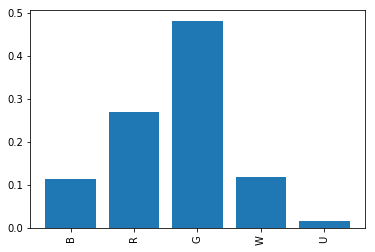

----------------
Card: Storm Fleet Pyromancer
Colors: ['R']
Mana cost: {4}{R}
type: Creature — Human Pirate Wizard
Predicted colors ['R']
Confidence: 0.9360362950128456
Oracle text: Raid — When Storm Fleet Pyromancer enters the battlefield, if you attacked with a creature this turn, Storm Fleet Pyromancer deals 2 damage to any target.
Intercept: 0.009064811984840606
Strongest features: [(('oracletext', 'deals'), 0.8601475114906335), (('oracletext', 'damage'), 0.7059753859256672), (('toughness', '2'), 0.47848565553996375), (('oracletext', 'damage_to'), 0.4694197846181925), (('oracletext', 'any_target'), 0.42787536489334477), (('oracletext', 'to_any'), 0.3997550029767158), (('oracletext', 'any'), 0.30721071300482855), (('oracletext', 'damage_to_any'), 0.287384916670514), (('oracletext', 'to_any_target'), 0.26927607988757923), (('type', 'Creature'), 0.23682498647032976)]


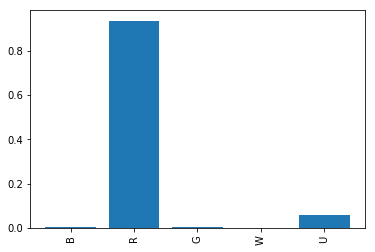

----------------
Card: Headhunter
Colors: ['B']
Mana cost: {1}{B}
type: Creature — Human Cleric
Predicted colors ['B']
Confidence: 0.8664764189229046
Oracle text: Whenever Headhunter deals combat damage to a player, that player discards a card.
Morph {B} (You may cast this card face down as a 2/2 creature for {3}. Turn it face up any time for its morph cost.)
Intercept: -0.049754132318157646
Strongest features: [(('oracletext', 'discards'), 1.37157815228715), (('oracletext', 'player_discards'), 0.7760824948609255), (('oracletext', 'discards_a'), 0.675502568147223), (('oracletext', 'discards_a_card'), 0.5613745666054065), (('toughness', '1'), 0.47584072784805187), (('subtype', 'Cleric'), 0.18961589328541786), (('oracletext', 'player'), 0.17756572391605457), (('oracletext', 'whenever'), 0.15379746447047793), (('oracletext', 'card'), 0.147200432380106), (('oracletext', 'a_card'), 0.13356198669028235)]


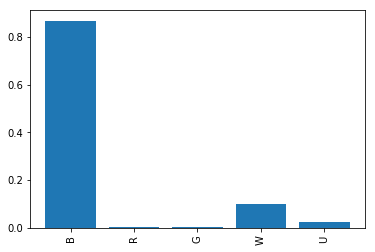

----------------
Card: Hashep Oasis
Colors: []
Mana cost: 
type: Land — Desert
Predicted colors ['B']
Confidence: 0.49849428899055126
Oracle text: {T}: Add {C}.
{T}, Pay 1 life: Add {G}.
{1}{G}{G}, {T}, Sacrifice a Desert: Target creature gets +3/+3 until end of turn. Activate this ability only any time you could cast a sorcery.
Intercept: -0.050126408041037115
Strongest features: [(('oracletext', 'life'), 1.1362428636321444), (('oracletext', 'creature'), 0.32115452566043234), (('oracletext', 'gets'), 0.30616106572773993), (('oracletext', 'sacrifice'), 0.2955138506004674), (('oracletext', 'sacrifice_a'), 0.27447286330122633), (('oracletext', '1_life'), 0.2573951071688982), (('oracletext', 'pay_1_life'), 0.25583776163473304), (('oracletext', 'pay_1'), 0.25583776163473304), (('oracletext', 'add'), 0.21780656555088052), (('oracletext', 'end_of'), 0.13930665425494257)]


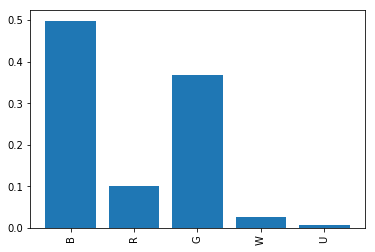

----------------
Card: Incinerate
Colors: ['R']
Mana cost: {1}{R}
type: Instant
Predicted colors ['R']
Confidence: 0.9723650822320221
Oracle text: Incinerate deals 3 damage to any target. A creature dealt damage this way can't be regenerated this turn.
Intercept: 0.00887194123490386
Strongest features: [(('oracletext', 'deals'), 0.8949473182411434), (('oracletext', 'damage'), 0.6638854726328205), (('oracletext', 'to_any'), 0.4041742351366867), (('oracletext', 'damage_to'), 0.37202232823812204), (('oracletext', 'any_target'), 0.36942309980096183), (('oracletext', 'damage_to_any'), 0.35279414787068436), (('oracletext', 'any'), 0.32691634724005386), (('oracletext', "can't"), 0.30617818024052756), (('oracletext', 'to_any_target'), 0.2285154193737059), (('oracletext', 'target'), 0.10225881357052984)]


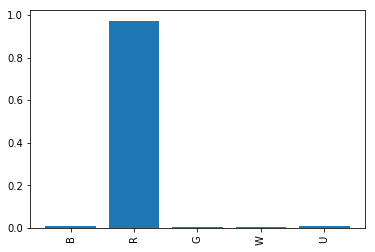

----------------
Card: Bloodfire Kavu
Colors: ['R']
Mana cost: {2}{R}{R}
type: Creature — Kavu
Predicted colors ['R']
Confidence: 0.9741991529300453
Oracle text: {R}, Sacrifice Bloodfire Kavu: It deals 2 damage to each creature.
Intercept: 0.003906754013294892
Strongest features: [(('oracletext', 'deals'), 1.0264555579390218), (('oracletext', 'damage'), 0.6439964236242465), (('subtype', 'Kavu'), 0.6305344315236002), (('toughness', '2'), 0.5069431348556598), (('name', 'kavu'), 0.4040164367349276), (('oracletext', 'damage_to'), 0.4015734002555795), (('oracletext', 'to_each'), 0.3896039775645789), (('oracletext', 'kavu'), 0.2383569729249742), (('oracletext', 'sacrifice'), 0.23358928043521615), (('oracletext', 'each_creature'), 0.22000977647079872)]


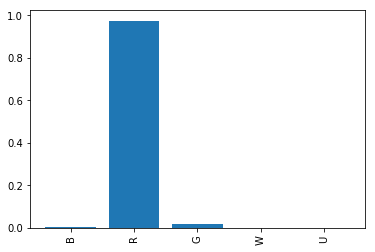

In [197]:
for _ in range(10):
    show_classification_info(m,matching_cards,np.random.randint(len(inds)))

In [198]:
for color in m.unique_colors:
    if len(color)==1:
        #priority = m.confidence*(m.unique_colors[m.predicted_color]==color)
        priority = (m.is_correct==0)*m.confidence*(m.unique_colors[m.predicted_color]==color)
        #and len(get_words_in_oracle_text(card))<10 for card in cards])
        ind = np.argsort(priority)[::-1]
        for i in ind[:10]:
            if priority[i]>0:
                show_classification_info(m,matching_cards,i,False)

----------------
Card: Viscerid Drone
Colors: ['U']
Mana cost: {1}{U}
type: Creature — Homarid Drone
Predicted colors ['B']
Confidence: 0.9999928467231767
Oracle text: {T}, Sacrifice a creature and a Swamp: Destroy target nonartifact creature. It can't be regenerated.
{T}, Sacrifice a creature and a snow Swamp: Destroy target creature. It can't be regenerated.
Intercept: -0.04920940143013199
Strongest features: [(('oracletext', 'destroy'), 1.0490816275754566), (('oracletext', 'destroy_target_creature'), 0.971529657947332), (('oracletext', 'sacrifice_a_creature'), 0.9208616170898558), (('oracletext', 'swamp'), 0.7394539840298383), (('toughness', '2'), 0.47527043492990406), (('oracletext', 'nonartifact'), 0.3869468603025443), (('oracletext', 'destroy_target'), 0.37236005303126324), (('oracletext', 'sacrifice'), 0.3668519541436982), (('oracletext', 'creature'), 0.3452468343449932), (('oracletext', 'a_swamp'), 0.3163915216189782)]
----------------
Card: Game of Chaos
Colors: ['R']
Mana cos

----------------
Card: Seize the Soul
Colors: ['B']
Mana cost: {2}{B}{B}
type: Instant
Predicted colors ['W']
Confidence: 0.9898305794101707
Oracle text: Destroy target nonwhite, nonblack creature. Create a 1/1 white Spirit creature token with flying.
Haunt (When this spell card is put into a graveyard after resolving, exile it haunting target creature.)
When the creature Seize the Soul haunts dies, destroy target nonwhite, nonblack creature. Create a 1/1 white Spirit creature token with flying.
Intercept: 0.02346152854404314
Strongest features: [(('oracletext', '1/1_white'), 1.1255203735501285), (('oracletext', 'white'), 0.9793605311073302), (('oracletext', 'nonwhite'), 0.8755112667813848), (('oracletext', 'flying'), 0.8251762408631144), (('oracletext', '1/1'), 0.5941014640926959), (('oracletext', 'a_1/1_white'), 0.5288799423041928), (('oracletext', 'create_a_1/1_white'), 0.4727103960499428), (('type', 'Instant'), 0.2880968333852296), (('name', 'the'), 0.2701993900460167), (('name', '

In [199]:
num_colors = np.array([len(set(c1)) for c1 in m.card_colors])
colors_added = np.array([len(set(c1).difference(set(c2))) 
                         for c1,c2 in zip(m.unique_colors[m.predicted_color],m.card_colors)])
colors_omitted = np.array([len(set(c2).difference(set(c1))) 
                           for c1,c2 in zip(m.unique_colors[m.predicted_color],m.card_colors)])

In [200]:
sparse.csr_matrix((np.ones_like(colors_added),(num_colors,colors_added+colors_omitted))).toarray()

array([[    0,     0,     0],
       [10620,     0,  2605]], dtype=int32)

----------------
Card: Grizzly Bears
Colors: ['G']
Mana cost: {1}{G}
type: Creature — Bear
Predicted colors ['G']
Confidence: 0.6548179000997758
Oracle text: 
Intercept: 0.009059745183909751
Strongest features: [(('subtype', 'Bear'), 0.9605564755124223), (('type', 'Creature'), 0.8921784623846685), (('manacost', '{@}'), 0.08159140150669958), (('name', 'bears'), 0.08051118896771309)]


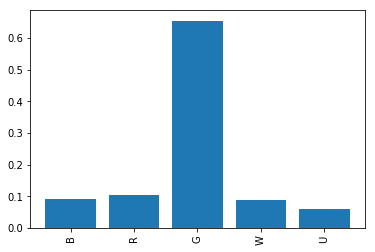

In [201]:
show_classification_info(m,matching_cards,get_card_index_by_name(matching_cards,'grizzly bears'))

In [202]:
def plot_accuracy_by_key(f,keys=None,is_numeric=True,sort_by_count=True,xlabel='',return_values=False):
    x = np.array([f(c) for c in matching_cards])
    if keys==None:
        keys,counts = np.unique(x,return_counts=True)
        if sort_by_count:
            keys = keys[np.argsort(counts)][::-1]
    x_by_key = {key: m.is_correct[np.logical_and(x==key,m.confidence>0)] for key in keys}
    y = [np.mean(x) for key,x in x_by_key.items()]
    yerr = [np.std(x)/np.sqrt(len(x)) for key,x in x_by_key.items()]
    plt.errorbar(x=keys,y=y,yerr=yerr)
    plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    if not is_numeric:
        plt.xticks(np.arange(0,len(keys)),label=keys,rotation=90)
    plt.show()
    if return_values:
        return keys,y,yerr,x_by_key

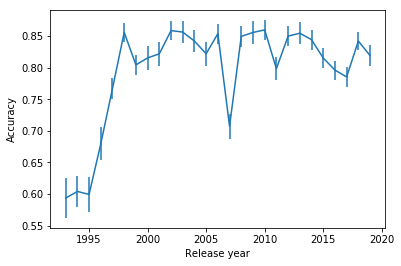

In [203]:
#plot_accuracy_by_key(lambda c:c['rarity'],keys=['common','uncommon','rare','mythic'],is_numeric=False)
#plot_accuracy_by_key(lambda c:len(get_words_in_oracle_text(c)),sort_by_count=False,xlabel='Number of words in oracle text')
#plot_accuracy_by_key(lambda c:c['type_line'].split(' — ')[0],is_numeric=False)
plot_accuracy_by_key(lambda c:int(c['released_at'].split('-')[0]),sort_by_count=False,xlabel='Release year')

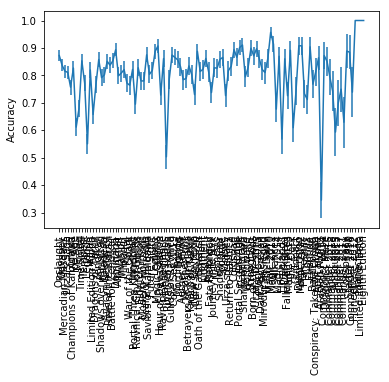

[('Arabian Nights', 52, 0.34615384615384615),
 ('Planar Chaos', 137, 0.5036496350364964),
 ('Legends', 196, 0.5510204081632653),
 ('Homelands', 88, 0.5681818181818182),
 ('Antiquities', 32, 0.59375),
 ('The Dark', 82, 0.6097560975609756),
 ('Ice Age', 219, 0.6118721461187214),
 ('Commander 2011', 27, 0.6296296296296297),
 ('Limited Edition Alpha', 193, 0.6580310880829016),
 ('Alliances', 93, 0.6774193548387096),
 ('Mirage', 219, 0.680365296803653),
 ('Portal Three Kingdoms', 151, 0.695364238410596),
 ('Commander 2013', 30, 0.7),
 ('Conflux', 73, 0.7123287671232876),
 ('Fallen Empires', 84, 0.7261904761904762),
 ('Visions', 117, 0.7264957264957265),
 ('Hour of Devastation', 140, 0.7285714285714285),
 ('New Phyrexia', 126, 0.7301587301587301),
 ('Planeshift', 75, 0.7333333333333333),
 ('Fate Reforged', 122, 0.7377049180327869),
 ('Commander 2016', 23, 0.7391304347826086),
 ('Commander 2018', 35, 0.7428571428571429),
 ('Guildpact', 78, 0.7435897435897436),
 ('Commander 2017', 28, 0.75),
 

In [208]:
keys,y,yerr,x_by_key = plot_accuracy_by_key(lambda c:c['set_name'],is_numeric=False,return_values=True,sort_by_count=True)
# This prints all the sets, plus the number of cards from that set and the model's 
# accuracy on predicting those cards' colors
list(zip(keys[np.argsort(y)],[x_by_key[key].shape[0] for key in keys[np.argsort(y)]],np.sort(y)))

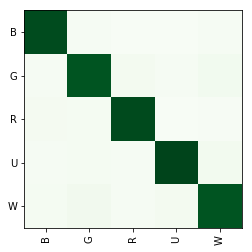

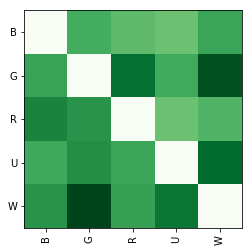

In [212]:
colors, confusion = get_confusion_matrix(m)
plt.imshow(confusion,cmap='Greens')
plt.xticks(np.arange(0,len(colors)),labels=colors,rotation=90)
plt.yticks(np.arange(0,len(colors)),labels=colors)
plt.show()

plt.imshow(np.triu(confusion,1)+np.tril(confusion,-1),cmap='Greens')
plt.xticks(np.arange(0,len(colors)),labels=colors,rotation=90)
plt.yticks(np.arange(0,len(colors)),labels=colors)
plt.show()

In [213]:
(confusion + confusion.T)/2

array([[0.8061756 , 0.04443771, 0.04638851, 0.0399587 , 0.04752339],
       [0.04443771, 0.78593041, 0.05464851, 0.04760087, 0.06821772],
       [0.04638851, 0.05464851, 0.81067961, 0.04060078, 0.04347063],
       [0.0399587 , 0.04760087, 0.04060078, 0.82649109, 0.05942709],
       [0.04752339, 0.06821772, 0.04347063, 0.05942709, 0.78617547]])

In [ ]:
#p = m.predicted_color_dists

#JS = np.sum(p[None,:,:]*np.log(p[:,None,:]+p[None,:,:]),axis=2)+np.sum(p[:,None,:]*np.log(p[:,None,:]+p[None,:,:]),axis=2)
#plt.imshow(JS)
#plt.show()
#X = 1-np.dot(,m.predicted_color_dists.T)

In [ ]:
#u,s,v = np.linalg.svd(p)

In [ ]:
#import sklearn
#X_embedded = sklearn.decomposition.TruncatedSVD(n_components=2).fit_transform(p)
#N=len(cards)
#X_embedded = TSNE(n_components=2).fit_transform(JS[:N,:N])
#c_dict = {'R' : 'red', 'B' : 'black', 'G' : 'green', 'U' : 'blue', 'W' : 'yellow'}
#for c in colors:
#    ind = np.array(m.card_colors)[:N]==c
#    plt.plot(X_embedded[ind,0],X_embedded[ind,1],'.',color=c_dict[c])